Este colab fue desarrollado por Arnold Charry Armero.

# Modelo (Q, R) - Enfoque Administrativo

El Modelo (Q, R) toma en cuenta la variabilidad tanto de la demanda como del tiempo de entrega $\tau$ para seleccionar el tamaño de lote $Q$ y el punto de reorden $R$ que satisfagan el objetivo trazado. En el enfoque administrativo, lo más importante es que se tenga determinado nivel de servicio dictaminado por la gerencia (Sipper & Bulfin, 1998). En este enfoque es primordial que el cliente pueda obtener el producto. Es primordial la satisfacción del cliente ante la minimización de los costos. Por esta razón, este modelo obtiene la cantidad del stock de seguridad $s$ teniendo como pilar fundamental el porcentaje de nivel de servicio seleccionado.

**Supuestos:**

*   Existe uno o varios productos en el sistema de inventarios
*   La demanda es estocástica
*   Se permiten faltantes
*   Hay un tiempo de entrega estocástico
*   Toda la cantidad ordenada llega al mismo tiempo.

Para calcular la demanda promedio (esperada) durante el tiempo de entrega y su respectiva desviación estándar, se emplean las siguientes ecuaciones,

$$ \bar{D_{\tau}} = \bar{D}\mu_{L} $$

$$ \sigma_{\tau }=\sqrt{\mu_{L}\sigma^{2}+\bar{D}^{2}\sigma_{L}^{2}} $$

Sabiendo que el punto de reorden se calcula como,

$$ R = \bar{D_{\tau}} + s $$

Y el stock de seguridad se halla, asumiendo distribución normal, de esta manera,

$$ s = z \sigma_{\tau } $$

Para el caso de la política 1 que tiene un nivel de servicio $\alpha $ que busca que no haya faltantes en cada ciclo de inventario,

$$ F(R) = α $$

$$ z = \frac{R-\bar{D_{\tau}}}{\sigma_{\tau }} $$

$$ \phi (z) = \frac{1}{\sqrt{2\pi }} \int_{-\infty}^{z} e^{\frac{-t^{2}}{2}}\:dt $$

Adicionalmente, se toma en cuenta la función de densidad de probabilidad que permite evaluar el nivel de servicio,

$$ L(z) = \frac{(1-\beta )Q}{\sigma _{\tau }}=\int_{z}^{\infty}\left ( x -z \right ) \phi \left ( x \right ) dx $$

Que para el caso de la Distribución Normal se puede escribir como,

$$ L(z) = \frac{1}{\sqrt{2\pi }}z \int_{-\infty}^{z} e^{\frac{-t^{2}}{2}}\:dt  + \frac{1}{\sqrt{2\pi }}e^{\frac{-z^{2}}{2}} - z$$

Y teniendo el costo de faltante como,

$$ π = \frac{hQ}{\left [ 1 - F(z) \right ]\bar{D}} $$

Y sabiendo que,

$$ Q^{*} = \sqrt{\frac{2A\bar{D}}{h}} $$

donde,

$ Q = \mathrm{Cantidad \:de \: lote \: a \: ordenar} $

$ c = \mathrm{Costo \: unitario \: de \: compra} $

$ \bar{D} = \mathrm{Tasa \:de \: demanda \: promedio} $

$ A = \mathrm{Costo \:unitario \: de \: ordenar} $

$ h = \mathrm{Costo \:unitario \: de \: mantener \: en \: inventario} $

$ R = \mathrm{Punto \: de \: reorden} $

$ s = \mathrm{Inventario \:de \: seguridad} $

$ \mu_{L} = \mathrm{Media \:de \: tiempo \: de \: entrega} $

$ \sigma_{L} = \mathrm{Desviación \: estándar \:de \: tiempo \: de \: entrega} $

$ π = \mathrm{Costo \:unitario \: de \: faltantes} $

$ \bar{D_{\tau}} = \mathrm{Media \: de \: la \: demanda \: durante \: el \: tiempo \: de \:entrega} $

$ \sigma_{\tau } = \mathrm{Desviación \: estándar \:de \: la \: demanda \: durante \: el \:tiempo \: de \: entrega} $

$ α = \mathrm{Nivel \:de \: servicio \: de \: ciclo} $

$ β = \mathrm{Tasa \:de \: surtido} $

$ z = \mathrm{Estandarización \:de \: Distribución \: Normal} $

Ahora se continua con la implementación en código resolviendo el siguiente ejemplo. Primero con la política 1 y después con la política 2.

La política 1 busca no tener faltantes en el porcetaje $\alpha$ de número de ciclos que hay en un año. No presta atención a la cantidad de faltantes, sólo se enfoca en que no hayan en la menor proporción de ciclos; esto es, la proporción de ciclos anuales en los que no ocurren faltantes, sin importar la magnitud del faltante (Sipper & Bulfin, 1998).

**Ejemplo 6-23. Punto de reorden: política 1.** La demanda anual de azúcar de un fabricante
local de refrescos tiene distribución normal con $D$ = 800 tons y $σ$ = 25 tons. El tiempo de entrega
del azúcar varía con media 5 y desviación estándar 1. Se supone que hay 250 días hábiles en un año. Se desea encontrar R y s para un nivel de servicio especificado de a = 0.95. Posee un costo de ordenar A de $\$50$, un costo unitario c de $\$4000$ y un porcentaje de mantener inventarios del 20%.

In [ ]:
#Se importan las librerias
import scipy as sp
from scipy.integrate import quad
import scipy.stats as st
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Se definen los parámetros.
D_bar = 800
sigma = 25
mu_L = (5/250)
sigma_L = (0/250)
alpha = 0.95
A = 50
c = 4000
i = 0.2
h = i * c

In [ ]:
#Se hallan los valores de Demanda y desviación estándar
D_tau = D_bar * mu_L
sigma_tau = np.sqrt(mu_L * sigma**2 + D_bar**2 * sigma_L**2)
print(f"La demanda durante el tiempo de entrega es {D_tau}")
print(f"La desviación estándar durante el tiempo de entrega es {sigma_tau}")

La demanda durante el tiempo de entrega es 16.0
La desviación estándar durante el tiempo de entrega es 3.5355339059327378


In [ ]:
#Se halla el valor de z
z = st.norm.ppf(alpha)
print(f"El valor de z es de {z}")

El valor de z es de 1.6448536269514722


In [ ]:
#Se halla el punto de reorden
R = D_tau + z * sigma_tau
print(f"El punto de reorden es {R} unidades")

El punto de reorden es 21.815435768383367 unidades


In [ ]:
#Inventario de seguridad
s = z * sigma_tau
print(f"El inventario de seguridad es {s} unidades")

El inventario de seguridad es 5.815435768383368 unidades


In [ ]:
#Se halla Q óptimo
def optimized_formula_EOQ(c, D, A, i):
  return np.sqrt((2 * A * D) / (c * i))

Q = optimized_formula_EOQ(c, D_bar, A, i)
print("El tamaño de lote debe de ser de {} unidades".format(Q))

El tamaño de lote debe de ser de 10.0 unidades


In [ ]:
#Se halla el costo por faltante
pi = (h * Q) / ((1 - alpha) * D_bar)
print("El costo por faltantes es de ${}.".format(pi))

El costo por faltantes es de $199.99999999999983.


Ahora se prosigue con la política 2,



La política 2 busca satisfacer la demanda en el porcentaje $\beta$ de un año. Presta atención a la cantidad de faltantes, procurando que en total sean un porcentaje menor; esto es, la proporción de demanda anual satisfecha con el inventario, sin relacionarla con el número de ciclos con faltantes (Sipper & Bulfin, 1998).

**Ejemplo 6-24. Punto de reorden: política 2.** De nuevo se trabaja con el ejemplo 6-23 calculando
los valores de Q y s en lugar de asignarles valores arbitrarios. B = 0.95 también.

In [ ]:
#Parámetro
betha = 0.95

In [ ]:
#Se halla Q óptimo
def optimized_formula_EOQ(c, D, A, i):
  return np.sqrt((2 * A * D) / (c * i))

Q = optimized_formula_EOQ(c, D_bar, A, i)
print("El tamaño de lote debe de ser de {} unidades".format(Q))

El tamaño de lote debe de ser de 10.0 unidades


In [ ]:
#Se define la tabla de L(z)
def Phi1(t):
  return (1/np.sqrt(2*np.pi))* np.exp((-1/2)*t**2)

def L(z):
  Phi = quad(Phi1, -np.inf, z)[0]
  return z*Phi + (1/np.sqrt(2*np.pi))* np.exp((-1/2)*z**2) - z

#Se crea la tabla A-2 como un diccionario
x = -4
L_table = {}

while x < 4:
  value = round(L(x), 4)
  L_table.setdefault(x, value)
  x += 0.01

#Se calcula L(z)
def L_value(betha, Q, sigma_tau):
  return round(((1 - betha) * Q) / sigma_tau, 4)

L = L_value(betha, Q, sigma_tau)
print(f"La probabilidad es de {L}")

La probabilidad es de 0.1414


In [ ]:
#Se obtiene el valor de z
if L_table.get(L) == None:
  res_key, res_val = min(L_table.items(), key=lambda x: abs(L - x[1]))
  z = list(L_table.keys())[list(L_table.values()).index(res_val)]
else:
  z = list(L_table.keys())[list(L_table.values()).index(L)]
print(f"El valor de z es {z}")

El valor de z es 0.7099999999999594


In [ ]:
#Se halla el punto de reorden
R = D_tau + z * sigma_tau
print(f"El punto de reorden es {R} unidades")

El punto de reorden es 18.510229073212102 unidades


In [ ]:
#Inventario de seguridad
s = z * sigma_tau
print(f"El inventario de seguridad es {s} unidades")

El inventario de seguridad es 2.5102290732121 unidades


In [ ]:
#Se halla el costo por faltante
f_z = st.norm.cdf(z)
pi = (h * Q) / ((1 - f_z) * D_bar)
print("El costo por faltantes es de ${}.".format(pi))

El costo por faltantes es de $41.8669182141308.


## Curva de intercambio de nivel de servicio

A pesar de que tener un nivel de servicio del 100% es lo ideal, esto incrementa sumamente los costos, lo cual no siempre es conveniente. Como decisión administrativa, se debe establecer con qué nivel de servicio se debe atender la demanda de manera que se incurra en unos costos razonables. La siguiente curva permite conocer la inversión en inventario en función del porcentaje seleccionado como nivel de servicio para ambas políticas. Sabiendo que la inversión en inventario de seguridad es,

$$ czσ_{τ} $$

In [ ]:
#Inversión Política 1
def investment_s_1(alpha):
  z = st.norm.ppf(alpha)
  s = z * sigma_tau
  inv = c * s
  return inv

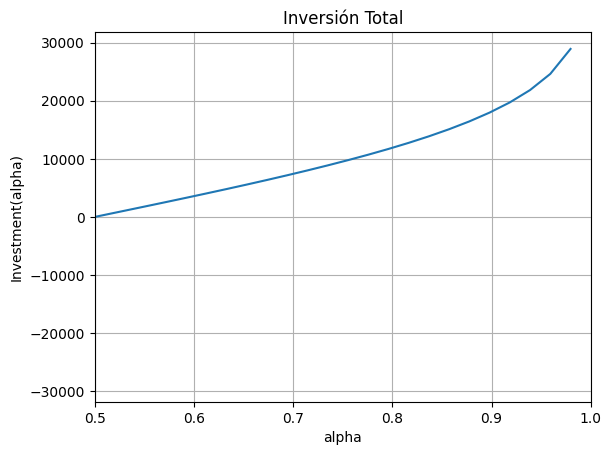

In [ ]:
#Se grafica la función para entender mejor su comportamiento
x = np.linspace(0, 1)
y = [investment_s_1(alpha) for alpha in x]
plt.grid()
plt.title("Inversión Total")
plt.xlim(0.5, 1)
plt.xlabel('alpha')
plt.ylabel('Investment(alpha)')
plt.plot(x, y)

In [ ]:
#Inversión Política 2
def investment_s_2(betha):
  L = L_value(betha, Q, sigma_tau)
  if L_table.get(L) == None:
    res_key, res_val = min(L_table.items(), key=lambda x: abs(L - x[1]))
    z = list(L_table.keys())[list(L_table.values()).index(res_val)]
  else:
    z = list(L_table.keys())[list(L_table.values()).index(L)]
  s = z * sigma_tau
  inv = c * s
  return inv

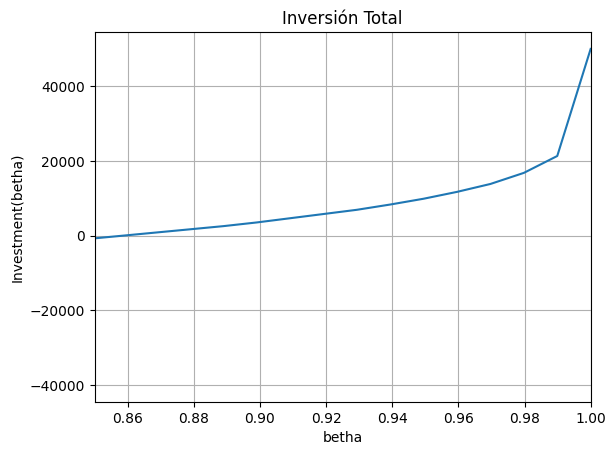

In [ ]:
#Se grafica la función para entender mejor su comportamiento
x = np.linspace(0, 1, 100)
y = [investment_s_2(betha) for betha in x]
plt.grid()
plt.title("Inversión Total")
plt.xlim(0.85, 1)
plt.xlabel('betha')
plt.ylabel('Investment(betha)')
plt.plot(x, y)

Así queda concluido el Modelo (Q, R) con enfoque administrativo.

### Referencias
*   Pulido, H. G. (2007). Control estadístico de calidad y Seis Sigma.
*   Lind, D. A., Marchal, W. G., & Wathen, S. A. (2005). Estadística aplicada a los negocios y a la economía.
*   Sipper, D., & Bulfin, R. L. (1998). Planeación y control de la producción.
*   Zill, D. G. (2000). Cálculo de una variable: trascendentes tempranas (4a. ed.).